<a href="https://colab.research.google.com/github/kaviya0716/Breast_cancer_prediction-using-ML/blob/main/breast_cancer_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Required Libraries

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
import warnings

# Settings to ignore warnings
warnings.filterwarnings('ignore')

# 2. Load the Datasets


In [20]:
from sklearn import datasets
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# 3. Convert to DataFrame for easier Visualization

In [21]:
df = pd.DataFrame(X, columns=data.feature_names).
df['target'] = y
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# 4. EDA Process: Visualizing the distribution of classes and features

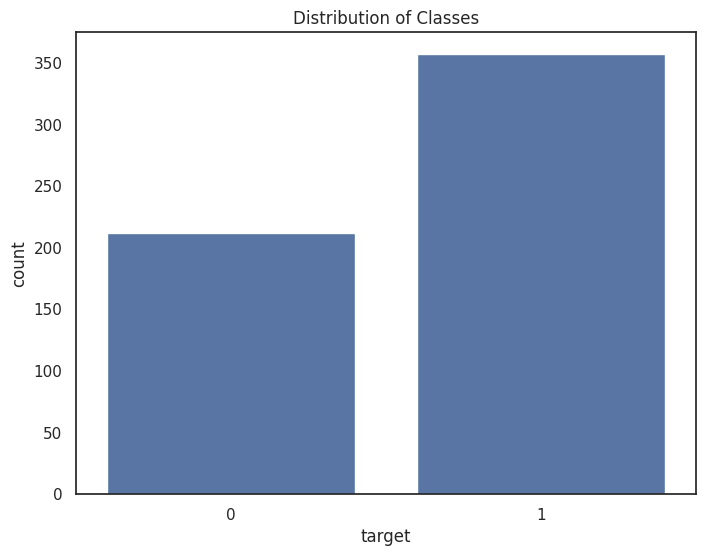

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Classes')
plt.show()

# 4. Data Preprocessing: Scaling features

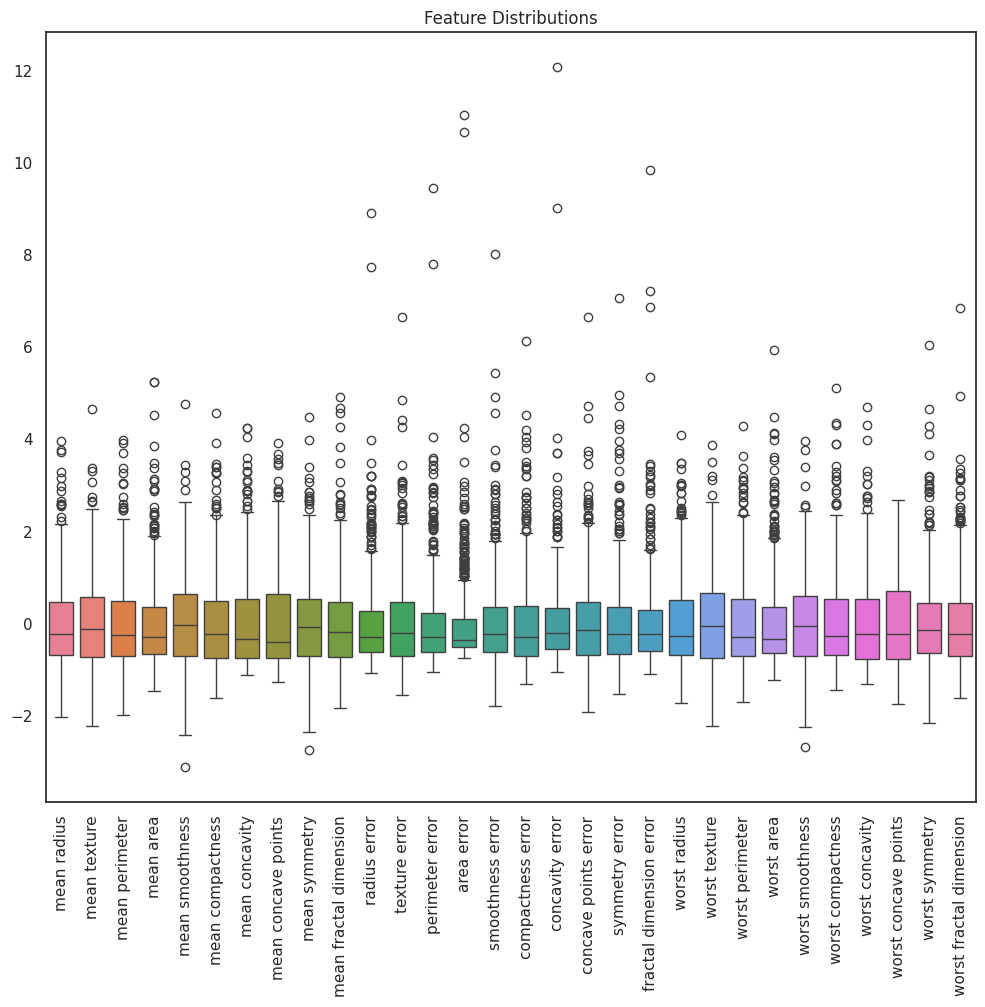

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_df =  pd.DataFrame(X_scaled, columns=data.feature_names)

plt.figure(figsize=(12, 10))
sns.boxplot(x_df)

plt.xticks(rotation=90)
plt.title('Feature Distributions')
plt.show()

In [24]:
#Check the shape of the dataset (rows, columns)
df.shape

(569, 31)

In [25]:
#Display the first 5 rows of the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 5. Overview of the Dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# 6. Visualizing Feature Relationships using PairGrid

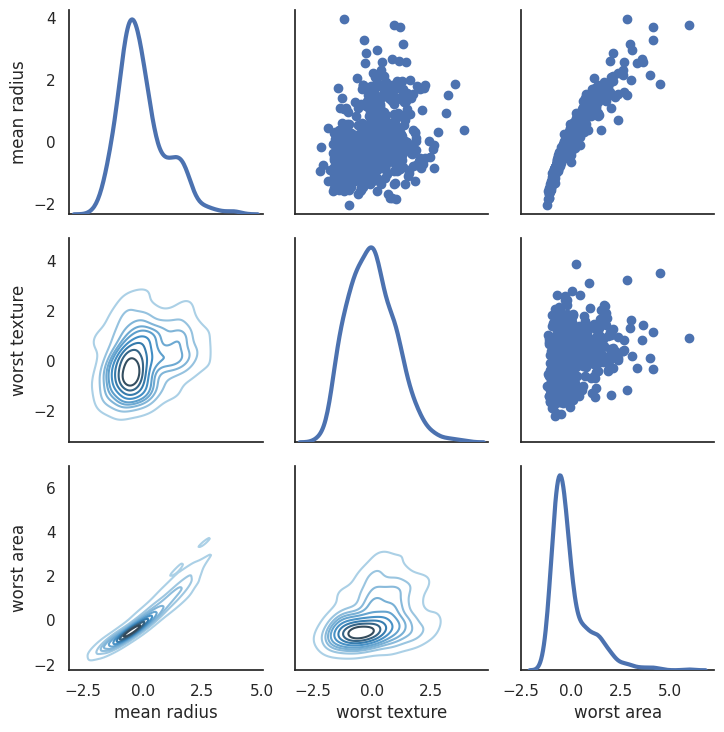

In [27]:
sns.set(style="white")
dd = x_df.loc[:,['mean radius','worst texture','worst area']]
g = sns.PairGrid(dd, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# 7. Correlation Heatmap of Features

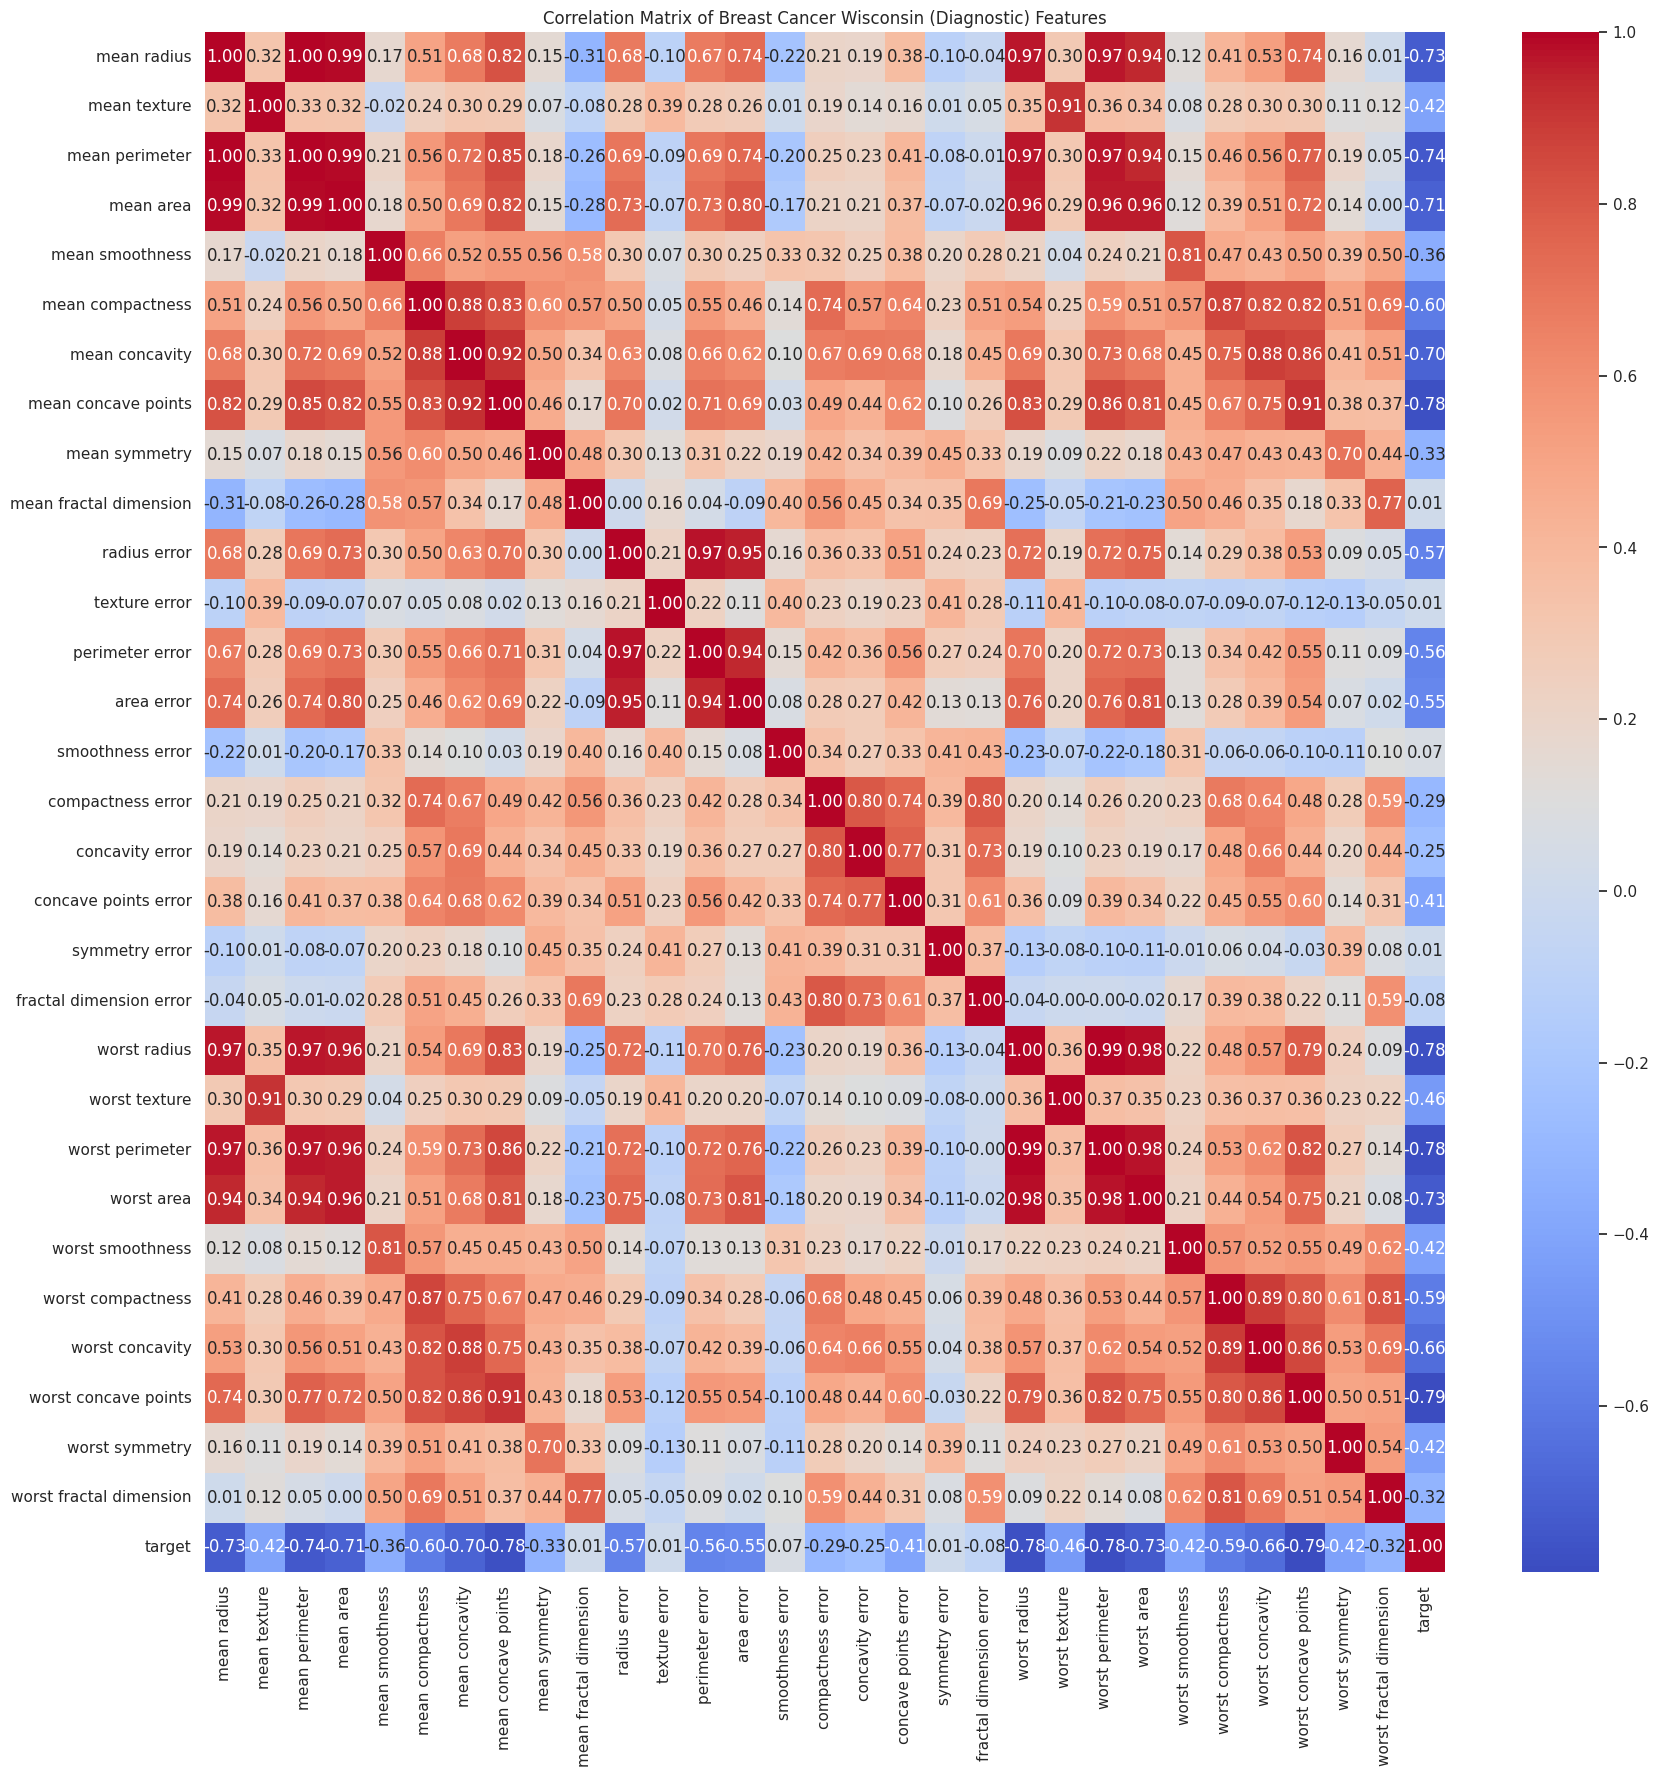

In [28]:
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Wisconsin (Diagnostic) Features')
plt.show()

# 8. Installing Dependencies

In [29]:
!pip install matplotlib-venn

In [30]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# 9. Data Balancing and Feature Normalization

In [31]:
from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Print class distribution before SMOTE
print("Class distribution before SMOTE:")
print(Counter(y_train))

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_train_smote))

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)  # Apply scaling to training data
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Outputs for confirmation
print("\nShapes after SMOTE and scaling:")
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Class distribution before SMOTE:
Counter({np.int64(1): 250, np.int64(0): 148})

Class distribution after SMOTE:
Counter({np.int64(1): 250, np.int64(0): 250})

Shapes after SMOTE and scaling:
X_train_smote shape: (500, 30)
y_train_smote shape: (500,)
X_test shape: (171, 30)
y_test shape: (171,)


# 10. Support Vector Machine (SVM) Tuning and Evaluation

In [32]:
# Define the parameter grid for each kernel
param_grids = {
    'linear': {'kernel': ['linear'], 'C': [0.1, 1, 10, 20]},
    'poly': {'kernel': ['poly'], 'C': [0.1, 1, 10, 20], 'degree': [2, 3, 4, 5]},
    'rbf': {'kernel': ['rbf'], 'C': [0.1, 1, 10, 20], 'gamma': [0.1, 1, 2, 'auto']}
}

best_models = {}  # To store the best model for each kernel

# GridSearchCV for hyperparameter tuning for each kernel
for kernel, param_grid in param_grids.items():
    svm_model = SVC(probability=True)
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search on the resampled and scaled training data (X_train_smote)
    grid_search.fit(X_train_smote, y_train_smote)

    best_models[kernel] = grid_search.best_estimator_  # Store the best model

    # Displaying the best hyperparameters for each kernel
    print(f"Best hyperparameters for {kernel.capitalize()} kernel:", grid_search.best_params_)

# Dictionary to store results and predictions
svm_results = {}
y_predSVM = {"linear": [], "poly": [], "rbf": []}

# Evaluating the best models on the test set for each kernel
for kernel, model in best_models.items():
    # Predict using the model on the scaled test set
    y_pred = model.predict(X_test)

    # Evaluation metrics for each kernel's best model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    y_predSVM[kernel] = y_pred  # Store predictions for each kernel
    svm_results[kernel] = {  # Store evaluation metrics
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

# Displaying the evaluation results in a DataFrame
pd.DataFrame(svm_results)

Best hyperparameters for Linear kernel: {'C': 0.1, 'kernel': 'linear'}
Best hyperparameters for Poly kernel: {'C': 20, 'degree': 3, 'kernel': 'poly'}
Best hyperparameters for Rbf kernel: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


,linear,poly,rbf
Accuracy,0.970760,0.941520,0.976608
Precision,0.981132,0.980198,0.990476
Recall,0.971963,0.925234,0.971963
F1 Score,0.976526,0.951923,0.981132
ROC-AUC,0.970356,0.946992,0.978169


# 11. Training a Linear SVM Model and Exporting as Pickle File

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from google.colab import files

iris = datasets.load_iris()
X = iris.data
y = iris.target


model = SVC(kernel='linear')
model.fit(X, y)

with open('breast_cancer.pkl', 'wb') as file:
    pickle.dump(model, file)

files.download('breast_cancer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 12. Model Serialization

In [34]:
import pickle
pickle.dump(model, open('breast_cancer.sav', 'wb'))